<a href="https://colab.research.google.com/github/Ahmad162539/Catalyst/blob/main/CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving A1_1.35V.xlsx to A1_1.35V (4).xlsx
Saving A1_1.45V-2.xlsx to A1_1.45V-2 (2).xlsx
Saving A1_1.55V.xlsx to A1_1.55V (3).xlsx
Saving A1_1.65V.xlsx to A1_1.65V (2).xlsx
Saving A10_1.2V.xlsx to A10_1.2V.xlsx
Saving A10_1.35V.xlsx to A10_1.35V (3).xlsx
Saving A10_1.35V-3.xlsx to A10_1.35V-3 (1).xlsx
Saving A10_1.45V.xlsx to A10_1.45V (1).xlsx
Saving A10_1.45V-3.xlsx to A10_1.45V-3 (1).xlsx
Saving A10_1.55V.xlsx to A10_1.55V (1).xlsx
Saving Cu_1.55V.xlsx to Cu_1.55V.xlsx
Saving HS1_1.2V.xlsx to HS1_1.2V (1).xlsx
Saving HS1_1.55V.xlsx to HS1_1.55V.xlsx
Saving HS1_1.65V.xlsx to HS1_1.65V.xlsx
Saving HS1_1.75V.xlsx to HS1_1.75V.xlsx
Saving HS1_1.85V.xlsx to HS1_1.85V.xlsx
Saving HS1_1.95V.xlsx to HS1_1.95V.xlsx
Saving HS10_1.2V.xlsx to HS10_1.2V.xlsx
Saving HS10_1.15V.xlsx to HS10_1.15V.xlsx
Saving HS10_1.25V.xlsx to HS10_1.25V.xlsx
Saving Ru_1.20V.xlsx to Ru_1.20V.xlsx
Total charge for A1_1.35V (4).xlsx: -239.3464 C
Total charge for A1_1.45V-2 (2).xlsx: -138.4683 C
Total charge for A1_1.

interactive(children=(Checkbox(value=True, description='A1_1.35V (4)'), Checkbox(value=True, description='A1_1…

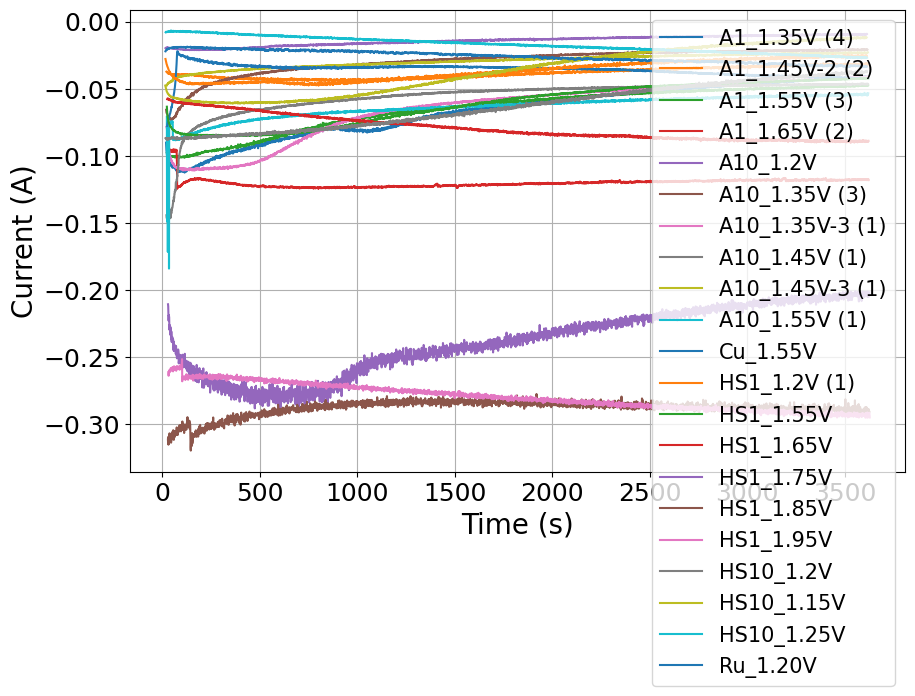

In [9]:
#With Integral
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.widgets import CheckButtons
from tkinter import Tk, Frame, filedialog
import os
import matplotlib.font_manager as fm
from google.colab import files
from ipywidgets import interact, Checkbox, VBox


# Function to load and process data, calculating charge for each file
def load_chronoamperometry_data():
    # Use Colab's file upload functionality
    uploaded = files.upload()  # This prompts the user to upload files
    data_dict = {}

    # Iterate through the uploaded files
    for file_name, file_content in uploaded.items():
        try:
            # Load the Excel file into a DataFrame
            data = pd.read_excel(file_name, skiprows=2)

            # Extract 'Time' and 'Current' columns or default to the first two columns
            time = data['Time (s)'] if 'Time (s)' in data.columns else data.iloc[:, 0]
            current = data['WE(1).Current (A)'] if 'WE(1).Current (A)' in data.columns else data.iloc[:, 1]

            # Calculate charge using the trapezoidal rule
            charge = np.trapz(current, time)
            print(f"Total charge for {file_name}: {charge:.4f} C")

            # Store the data in a dictionary
            data_dict[file_name] = {"time": time, "current": current, "charge": charge}
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

    return data_dict


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from ipywidgets import interact, Checkbox, VBox

# Function to upload and process data
def load_chronoamperometry_data():
    # Use Colab's file upload functionality
    uploaded = files.upload()  # Prompt the user to upload files
    data_dict = {}

    # Iterate through the uploaded files
    for file_name, file_content in uploaded.items():
        try:
            # Load the Excel file into a DataFrame
            data = pd.read_excel(file_name, skiprows=2)

            # Extract 'Time' and 'Current' columns or default to the first two columns
            time = data['Time (s)'] if 'Time (s)' in data.columns else data.iloc[:, 0]
            current = data['WE(1).Current (A)'] if 'WE(1).Current (A)' in data.columns else data.iloc[:, 1]

            # Calculate charge using the trapezoidal rule
            charge = np.trapz(current, time)
            print(f"Total charge for {file_name}: {charge:.4f} C")

            # Store the data in a dictionary
            data_dict[file_name] = {"time": time, "current": current, "charge": charge}
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")

    return data_dict

# Function to create an interactive plot
def plot_interactive_chronoamperometry(data_dict):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each dataset and store lines for toggling visibility
    plot_lines = {}
    for file_name, data in data_dict.items():
        label = file_name.replace('.xlsx', '')
        line, = ax.plot(data["time"], data["current"], label=label, alpha=1)
        plot_lines[file_name] = line

    # Customize plot
    ax.set_xlabel("Time (s)", fontsize=20)
    ax.set_ylabel("Current (A)", fontsize=20)
    plt.tick_params(axis='both', labelsize=18)
    ax.legend(fontsize=15)
    ax.grid(True)

    # Function to toggle visibility of lines
    def toggle_visibility(**kwargs):
        for file_name, visible in kwargs.items():
            plot_lines[file_name].set_visible(visible)
        fig.canvas.draw()

    # Create checkboxes for toggling visibility
    checkboxes = {file_name: Checkbox(value=True, description=file_name.replace('.xlsx', ''))
                  for file_name in data_dict.keys()}
    interact(toggle_visibility, **checkboxes)

# Main function to load data and create the plot
def main():
    data_dict = load_chronoamperometry_data()
    if data_dict:
        plot_interactive_chronoamperometry(data_dict)

# Run the main function
main()

